In [1]:
import boto3
import dask.dataframe as dd
from sagemaker import get_execution_role
from fastparquet import ParquetFile
import pandas as pd

role = get_execution_role()
bucket='tally-ai-dspt3'
folder = 'yelp-kaggle-raw-data'

ModuleNotFoundError: No module named 'fastparquet'

In [2]:
#Loading data
data = 'final_combined.parquet.gzip'
data_location = 's3://{}/{}/{}'.format(bucket, folder, data)
df = dd.read_parquet(data_location)
df.head()


,address,business_id,categories,city,is_open,latitude,longitude,postal_code,state,stars_business,...,compliment_writer,elite,fans,friends,yelping_since,name_users,review_count_users,cool_users,funny_users,useful_users
index,,,,,,,,,,,,,,,,,,,,,
0,"3175 Rutherford Rd, Unit 47",E7v9sMJx4_Swx7VtymNt5Q,"Food Delivery Services, Food, Thai, Restaurants",Vaughan,1,43.827830,-79.538072,L4K 5Y6,ON,4.0,...,0,,0,None,2011-06-22 21:48:15,F,4,2,0,6
1,2777 Steeles Avenue W,4Lh1lZXTf0EoNqdzT60GPQ,"Coffee & Tea, Food, Ice Cream & Frozen Yogurt,...",Toronto,0,43.782160,-79.490430,M3J 3K5,ON,4.0,...,0,,0,None,2011-06-22 21:48:15,F,4,2,0,6
2,11155 S Eastern Ave,RPjBB_uhHQ4oxp39Jqm_HQ,"Sandwiches, Restaurants",Henderson,1,35.989803,-115.101597,89052,NV,3.0,...,0,,1,"CyOjizbfMb2hxkLIwE76Ow, MbZ0W9PjmlI7J9fs4SiNrw...",2013-02-08 21:54:49,Jake,50,17,17,53
3,"140 S Green Valley Pkwy, Ste 142",SR0Q2hAEMJ_m23O_x-khSQ,"Restaurants, American (New), Gluten-Free, Vege...",Henderson,0,36.022441,-115.083539,89012,NV,4.0,...,0,,1,"CyOjizbfMb2hxkLIwE76Ow, MbZ0W9PjmlI7J9fs4SiNrw...",2013-02-08 21:54:49,Jake,50,17,17,53
4,"8174 S Las Vegas Blvd, Ste 101",V_TxEdzeEs8P5nGPANOY7A,"Cocktail Bars, Gay Bars, Cafes, Bars, Nightlif...",Las Vegas,0,36.040642,-115.170643,89123,NV,3.5,...,0,,1,"CyOjizbfMb2hxkLIwE76Ow, MbZ0W9PjmlI7J9fs4SiNrw...",2013-02-08 21:54:49,Jake,50,17,17,53


In [3]:
#Convert dd to pd dataframe
df = df.compute()

In [4]:
df.dtypes

address                         object
business_id                     object
categories                      object
city                            object
is_open                          int64
latitude                       float64
longitude                      float64
postal_code                     object
state                           object
stars_business                 float64
date                    datetime64[ns]
review_id                       object
text                            object
user_id                         object
stars_review                     int64
stars_reviews                    int64
name_reviews                    object
review_count_reviews             int64
cool_reviews                     int64
funny_reviews                    int64
useful_reviews                   int64
average_stars                  float64
compliment_cool                  int64
compliment_cute                  int64
compliment_funny                 int64
compliment_hot           

In [5]:
df.isna().sum()

address                 0
business_id             0
categories              0
city                    0
is_open                 0
latitude                0
longitude               0
postal_code             0
state                   0
stars_business          0
date                    0
review_id               0
text                    0
user_id                 0
stars_review            0
stars_reviews           0
name_reviews            0
review_count_reviews    0
cool_reviews            0
funny_reviews           0
useful_reviews          0
average_stars           0
compliment_cool         0
compliment_cute         0
compliment_funny        0
compliment_hot          0
compliment_list         0
compliment_more         0
compliment_note         0
compliment_photos       0
compliment_plain        0
compliment_profile      0
compliment_writer       0
elite                   0
fans                    0
friends                 0
yelping_since           0
name_users              0
review_count

In [6]:
df['stars_review'].unique

<bound method Series.unique of index
0        5
1        4
2        2
3        4
4        5
5        3
6        4
7        5
8        4
9        5
10       2
11       5
12       1
13       5
14       5
15       2
16       2
17       2
18       5
19       3
20       5
21       5
22       5
23       4
24       5
25       5
26       5
27       5
28       5
29       5
        ..
24723    1
24724    5
24725    5
24726    5
24727    1
24728    5
24729    2
24730    2
24731    5
24732    1
24733    5
24734    4
24735    2
24736    5
24737    5
24738    3
24739    5
24740    1
24741    5
24742    3
24743    5
24744    5
24745    5
24746    1
24747    1
24748    1
24749    5
24750    1
24751    3
24752    5
Name: stars_review, Length: 5055992, dtype: int64>

In [8]:
#Check the value of stars_reviews to see if it's different from stars_review
df['stars_reviews'].unique

<bound method Series.unique of index
0        5
1        4
2        2
3        4
4        5
5        3
6        4
7        5
8        4
9        5
10       2
11       5
12       1
13       5
14       5
15       2
16       2
17       2
18       5
19       3
20       5
21       5
22       5
23       4
24       5
25       5
26       5
27       5
28       5
29       5
        ..
24723    1
24724    5
24725    5
24726    5
24727    1
24728    5
24729    2
24730    2
24731    5
24732    1
24733    5
24734    4
24735    2
24736    5
24737    5
24738    3
24739    5
24740    1
24741    5
24742    3
24743    5
24744    5
24745    5
24746    1
24747    1
24748    1
24749    5
24750    1
24751    3
24752    5
Name: stars_reviews, Length: 5055992, dtype: int64>

In [9]:
#It appears to be the same, so I dropped the stars_reviews one
df = df.drop(['stars_reviews'], axis=1)

In [10]:
df.columns

Index(['address', 'business_id', 'categories', 'city', 'is_open', 'latitude',
       'longitude', 'postal_code', 'state', 'stars_business', 'date',
       'review_id', 'text', 'user_id', 'stars_review', 'name_reviews',
       'review_count_reviews', 'cool_reviews', 'funny_reviews',
       'useful_reviews', 'average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'elite',
       'fans', 'friends', 'yelping_since', 'name_users', 'review_count_users',
       'cool_users', 'funny_users', 'useful_users'],
      dtype='object')

# Categories

In [11]:
#Check all kinds of restaurants
df['categories'].value_counts()

Restaurants, Mexican                                                                                                                   65755
Mexican, Restaurants                                                                                                                   59945
Chinese, Restaurants                                                                                                                   33773
Restaurants, Chinese                                                                                                                   33081
Restaurants, Pizza                                                                                                                     31809
Pizza, Restaurants                                                                                                                     30492
Italian, Restaurants                                                                                                                   28018
Restaurants, 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

There are 34088 different types of restaurants in Yelp


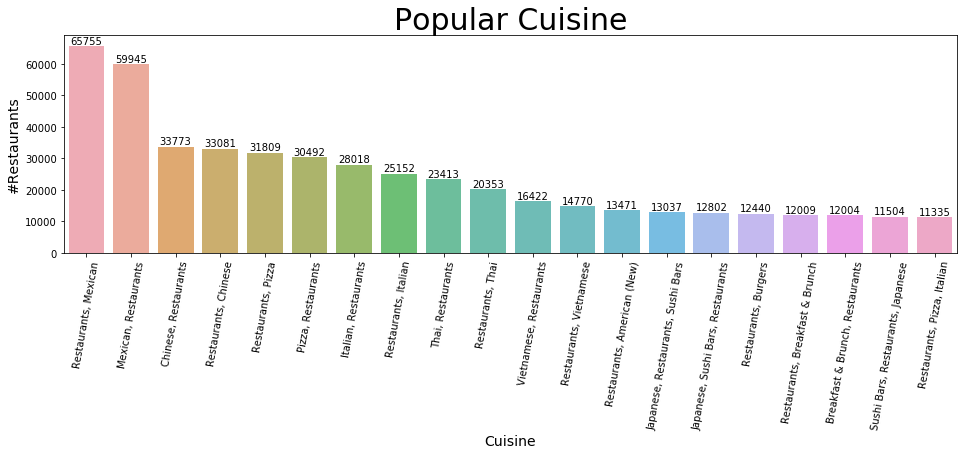

In [15]:
#Created a graph for top categories

x=df['categories'].value_counts()
print(f'There are {len(x)} different types of restaurants in Yelp')

#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Popular Cuisine", fontsize=30)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('#Restaurants', fontsize=14)
plt.xlabel('Cuisine', fontsize=14)

#adding the text labels
rets = ax.patches
labels = x.values
for rect, label in zip(rets, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom')

plt.show()
        

In [ ]:
df['categories'].value_counts()

# City with the most review

In [ ]:
#Sort city from top to bottom by rating counts
x=df['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("City with most reviews")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('#restaurants', fontsize=14)
plt.xlabel('City', fontsize=14)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()    